In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [62]:
class Visualizor():
    """
    This class use to draw the win_rate-return_rate graph of a file.
    """
    def __init__(self,file:str):
        self.df=pd.read_csv(file)
        file=file.split("/")[-1]
        file=file.split("\\")[-1]
        self.title=file
    def drawFile(self,X:str,Y:str):
        plt.scatter(self.df[X],self.df[Y])
        plt.xlabel(X)
        plt.ylabel(Y)
        plt.title(self.title)
        plt.show()

class MultiVisualizor():
    """
    This class use to draw the win_rate-return_rate graph of many files.
    """
    def __init__(self,folder):
        self.folder=folder
    def drawFiles(self,X:str,Y:str,save=True):
        for file in os.listdir(self.folder):
            df=pd.read_csv(self.folder+"/"+file)
            self.plt=plt.scatter(df[X],df[Y],label=file)
        folder=(self.folder).split("/")[-1]
        folder=(folder).split("\\")[-1]
        plt.title(folder)
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        plt.xlabel(X)
        plt.ylabel(Y)
        if save:
            try:
                if (not os.path.exists("Visualization")):
                    os.makedirs("Visualization")
                plt.savefig(f"Visualization/figure_{folder}.png")
                print("Figure is Saved.")
            except Exception as e:
                print(f"{self.folder} saving with a error: {e}")
        plt.show()

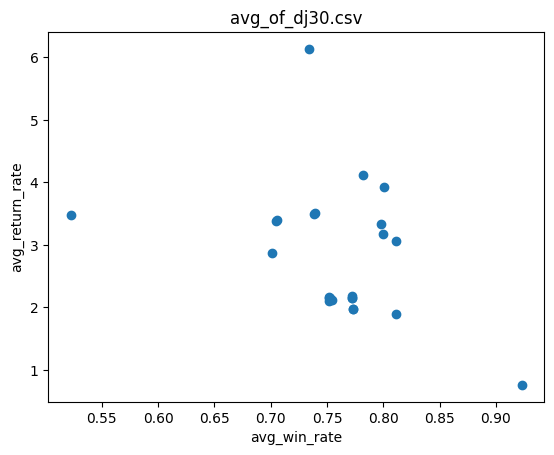

Figure is Saved.


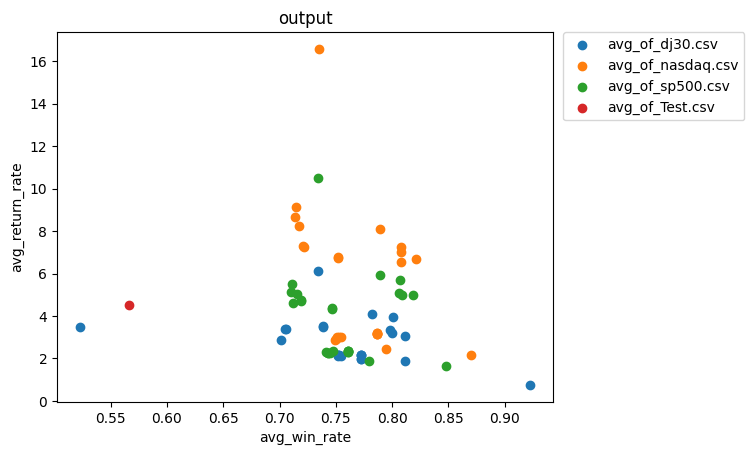

In [63]:
VL=Visualizor("Conclusion/output/avg_of_dj30.csv")
VL.drawFile("avg_win_rate","avg_return_rate")

MVL=MultiVisualizor("Conclusion/output")
MVL.drawFiles("avg_win_rate","avg_return_rate")